In [51]:
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os, os.path, sys

In [67]:
image_path = Path('/home/henrik/master_thesis/data/Kvasir-SEG/images/')
mask_path  = Path('/home/henrik/master_thesis/data/Kvasir-SEG/masks/')
masked_path = Path('/home/henrik/master_thesis/data/Kvasir-SEG/masked_images/')

num_images = len([name for name in os.listdir(image_path) if os.path.isfile(os.path.join(DIR, name))])

### Read all images and masks and store them in lists

In [66]:
all_images = []
name_list = []

# iterate over all image paths
for path in image_path.iterdir():
    if str(path).endswith(".jpg"):
        filename = path.name
        name_list.append(filename)
        path_in_str = str(path)
        all_images.append(cv2.imread(path_in_str))

In [64]:
all_masks = []

# iterate over all image paths
for path in mask_path.iterdir():
    if str(path).endswith(".jpg"):
        path_in_str = str(path)
        all_masks.append(cv2.imread(path_in_str))

assert num_images == len(all_masks), 'Not same number of masks as images'

### Combine image and mask to create masked image
Also normalizes the images to be in range [0, 1]

In [74]:
masked_images = []

for i in range(num_images):
    masked = cv2.bitwise_and(all_masks[i], all_images[i])
    masked_images.append(masked/255.0)

### Save the images

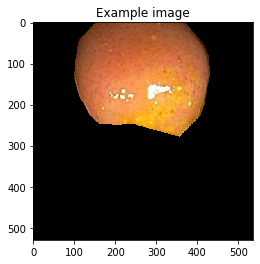

In [73]:
rgb_im = cv2.cvtColor(masked_image[0], cv2.COLOR_BGR2RGB)

plt.imshow(rgb_im)
plt.title('Example image')
plt.show()

In [72]:
os.chdir(masked_path)

for i in range(num_images):
    cv2.imwrite(name_list[i], masked_images[i])